## HomeWork 5
- NGUYEN NGOC THIEN PHUC
- N21DCCN066
- D21CQCNPM01-N

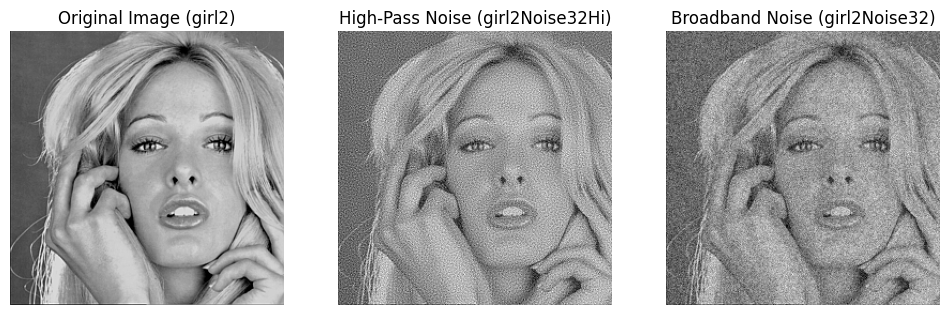

MSE for girl2Noise32Hi relative to girl2: 95.12
MSE for girl2Noise32 relative to girl2: 96.87


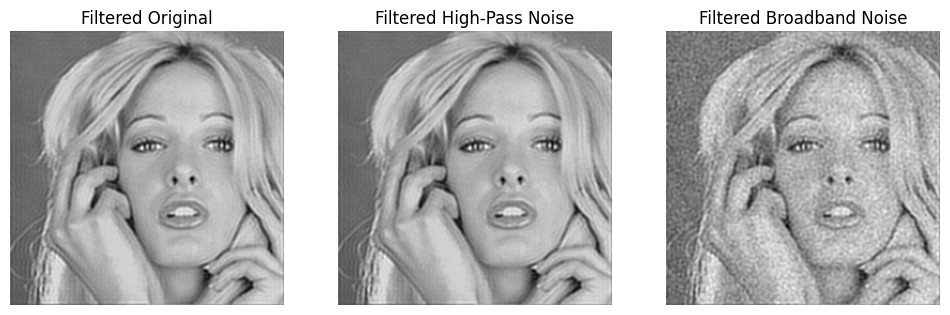

MSE for filtered girl2Noise32Hi: 399.00
ISNR for girl2Noise32Hi: -6.23 dB
MSE for filtered girl2Noise32: 550.88
ISNR for girl2Noise32: -7.55 dB


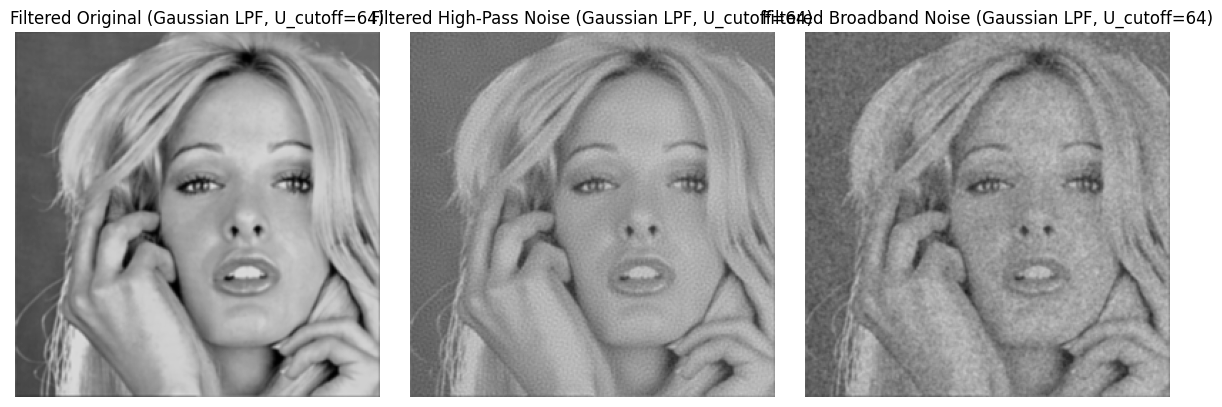

MSE for filtered (Gaussian, U_cutoff=64) girl2Noise32Hi: 422.71
ISNR for (Gaussian, U_cutoff=64) girl2Noise32Hi: -6.48 dB
MSE for filtered (Gaussian, U_cutoff=64) girl2Noise32: 536.99
ISNR for (Gaussian, U_cutoff=64) girl2Noise32: -7.44 dB


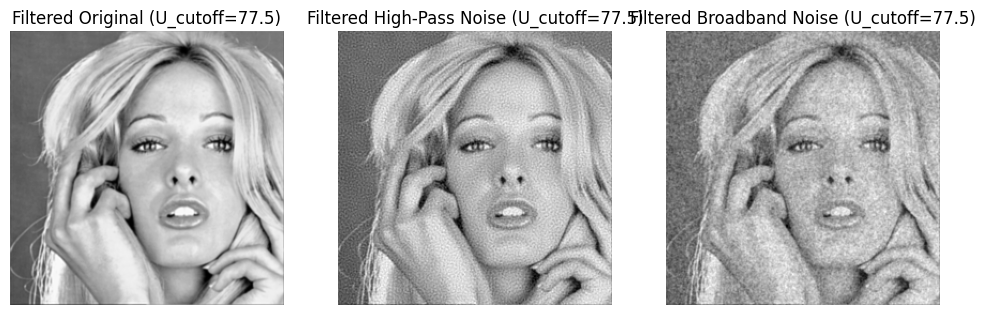

MSE for filtered (Gaussian, U_cutoff=77.5) girl2Noise32Hi: 413.73
ISNR for (Gaussian, U_cutoff=77.5) girl2Noise32Hi: -6.38 dB
MSE for filtered (Gaussian, U_cutoff=77.5) girl2Noise32: 531.09
ISNR for (Gaussian, U_cutoff=77.5) girl2Noise32: -7.39 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
# (a)
# Helper function to read binary images
def read_image(file_name, size=(256, 256)):
    return np.fromfile(file_name, dtype=np.uint8).reshape(size)

# Load the images
girl2 = read_image("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/girl2bin.sec")
girl2_noise_hi = read_image("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/girl2Noise32Hibin.sec")
girl2_noise = read_image("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/girl2Noise32bin.sec")

# Compute MSE
def compute_mse(original, noisy):
    return np.mean((original - noisy) ** 2)

mse_hi = compute_mse(girl2, girl2_noise_hi)
mse_broadband = compute_mse(girl2, girl2_noise)

# Display the images
plt.figure(figsize=(12, 4))
titles = ["Original Image (girl2)", "High-Pass Noise (girl2Noise32Hi)", "Broadband Noise (girl2Noise32)"]
images = [girl2, girl2_noise_hi, girl2_noise]

cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Original Image (girl2).png", girl2)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)High-Pass Noise (girl2Noise32Hi).png", girl2_noise_hi)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Broadband Noise (girl2Noise32).png", girl2_noise)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

print(f"MSE for girl2Noise32Hi relative to girl2: {mse_hi:.2f}")
print(f"MSE for girl2Noise32 relative to girl2: {mse_broadband:.2f}")

# (b)
# Create the low-pass filter in the frequency domain
U_cutoff = 64
U, V = np.meshgrid(np.arange(-128, 128), np.arange(-128, 128))
H = np.sqrt(U**2 + V**2) <= U_cutoff
H = np.fft.fftshift(H)

# Apply the filter
def apply_filter(image, H):
    dft_image = np.fft.fft2(image)
    filtered_dft = dft_image * H
    filtered_image = np.fft.ifft2(filtered_dft)
    return np.real(filtered_image)

filtered_girl2 = apply_filter(girl2, H)
filtered_girl2_noise_hi = apply_filter(girl2_noise_hi, H)
filtered_girl2_noise = apply_filter(girl2_noise, H)

# Compute MSE and ISNR
mse_filtered_hi = compute_mse(girl2, filtered_girl2_noise_hi)
mse_filtered_broadband = compute_mse(girl2, filtered_girl2_noise)
isnr_hi = 10 * np.log10(mse_hi / mse_filtered_hi)
isnr_broadband = 10 * np.log10(mse_broadband / mse_filtered_broadband)

# Display results
plt.figure(figsize=(12, 4))
titles = ["Filtered Original", "Filtered High-Pass Noise", "Filtered Broadband Noise"]
images = [filtered_girl2, filtered_girl2_noise_hi, filtered_girl2_noise]

cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Original.png", filtered_girl2)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered High-Pass Noise.png", filtered_girl2_noise_hi)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Broadband Noise.png", filtered_girl2_noise)


for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

print(f"MSE for filtered girl2Noise32Hi: {mse_filtered_hi:.2f}")
print(f"ISNR for girl2Noise32Hi: {isnr_hi:.2f} dB")
print(f"MSE for filtered girl2Noise32: {mse_filtered_broadband:.2f}")
print(f"ISNR for girl2Noise32: {isnr_broadband:.2f} dB")

# (c)
# Part (c): Apply Gaussian Low-Pass Filter (U_cutoff = 64)
U_cutoff_c = 64
sigma_c = 0.19 * 256 / U_cutoff_c

# Create Gaussian filter in the frequency domain
H_gaussian_c = np.exp(-2 * (np.pi**2) * (sigma_c**2) * (U**2 + V**2) / (256**2))
H_gaussian_c = np.fft.fftshift(H_gaussian_c)

# Apply Gaussian filter to all three images
filtered_girl2_gauss_c = apply_filter(girl2, H_gaussian_c)
filtered_girl2_noise_hi_gauss_c = apply_filter(girl2_noise_hi, H_gaussian_c)
filtered_girl2_noise_gauss_c = apply_filter(girl2_noise, H_gaussian_c)

# Display the filtered images
plt.figure(figsize=(12, 4))
titles = [
    "Filtered Original (Gaussian LPF, U_cutoff=64)",
    "Filtered High-Pass Noise (Gaussian LPF, U_cutoff=64)",
    "Filtered Broadband Noise (Gaussian LPF, U_cutoff=64)"
]
images = [
    filtered_girl2_gauss_c,
    filtered_girl2_noise_hi_gauss_c,
    filtered_girl2_noise_gauss_c
]

cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Original (Gaussian LPF, U_cutoff=64).png", filtered_girl2_gauss_c)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered High-Pass Noise (Gaussian LPF, U_cutoff=64).png", filtered_girl2_noise_hi_gauss_c)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Broadband Noise (Gaussian LPF, U_cutoff=64).png", filtered_girl2_noise_gauss_c)

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)  # Full-scale contrast
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# Compute MSE and ISNR for Part (c)
mse_filtered_hi_gauss_c = compute_mse(girl2, filtered_girl2_noise_hi_gauss_c)
mse_filtered_broadband_gauss_c = compute_mse(girl2, filtered_girl2_noise_gauss_c)
isnr_hi_gauss_c = 10 * np.log10(mse_hi / mse_filtered_hi_gauss_c)
isnr_broadband_gauss_c = 10 * np.log10(mse_broadband / mse_filtered_broadband_gauss_c)

# Print MSE and ISNR
print(f"MSE for filtered (Gaussian, U_cutoff=64) girl2Noise32Hi: {mse_filtered_hi_gauss_c:.2f}")
print(f"ISNR for (Gaussian, U_cutoff=64) girl2Noise32Hi: {isnr_hi_gauss_c:.2f} dB")
print(f"MSE for filtered (Gaussian, U_cutoff=64) girl2Noise32: {mse_filtered_broadband_gauss_c:.2f}")
print(f"ISNR for (Gaussian, U_cutoff=64) girl2Noise32: {isnr_broadband_gauss_c:.2f} dB")


# (d)
# Set U_cutoff for part (d)
U_cutoff_d = 77.5

# Adjust sigma for the new cutoff frequency
sigma_d = 0.19 * 256 / U_cutoff_d

# Create the Gaussian filter in the frequency domain
H_gaussian_d = np.exp(-2 * (np.pi**2) * (sigma_d**2) * (U**2 + V**2) / (256**2))
H_gaussian_d = np.fft.fftshift(H_gaussian_d)

# Apply the filter to the images
filtered_girl2_gauss_d = apply_filter(girl2, H_gaussian_d)
filtered_girl2_noise_hi_gauss_d = apply_filter(girl2_noise_hi, H_gaussian_d)
filtered_girl2_noise_gauss_d = apply_filter(girl2_noise, H_gaussian_d)

# Compute MSE and ISNR
mse_filtered_hi_gauss_d = compute_mse(girl2, filtered_girl2_noise_hi_gauss_d)
mse_filtered_broadband_gauss_d = compute_mse(girl2, filtered_girl2_noise_gauss_d)
isnr_hi_gauss_d = 10 * np.log10(mse_hi / mse_filtered_hi_gauss_d)
isnr_broadband_gauss_d = 10 * np.log10(mse_broadband / mse_filtered_broadband_gauss_d)

# Display the filtered images
plt.figure(figsize=(12, 4))
titles = [
    "Filtered Original (U_cutoff=77.5)",
    "Filtered High-Pass Noise (U_cutoff=77.5)",
    "Filtered Broadband Noise (U_cutoff=77.5)"
]
images = [filtered_girl2_gauss_d, filtered_girl2_noise_hi_gauss_d, filtered_girl2_noise_gauss_d]

cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Original (U_cutoff=77.5).png", filtered_girl2_gauss_d)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered High-Pass Noise (U_cutoff=77.5).png", filtered_girl2_noise_hi_gauss_d)
cv.imwrite("D:/Full-Document/Information-Technology/Image-Processing/Exercises/HomeWork5/(5_2)Filtered Broadband Noise (U_cutoff=77.5).png", filtered_girl2_noise_gauss_d)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Print results
print(f"MSE for filtered (Gaussian, U_cutoff=77.5) girl2Noise32Hi: {mse_filtered_hi_gauss_d:.2f}")
print(f"ISNR for (Gaussian, U_cutoff=77.5) girl2Noise32Hi: {isnr_hi_gauss_d:.2f} dB")
print(f"MSE for filtered (Gaussian, U_cutoff=77.5) girl2Noise32: {mse_filtered_broadband_gauss_d:.2f}")
print(f"ISNR for (Gaussian, U_cutoff=77.5) girl2Noise32: {isnr_broadband_gauss_d:.2f} dB")
